## Introduction

The objective of this case study is to provide an additional example of market segmentation analysis using a different empirical dataset. The dataset was originally collected to compare the effectiveness of various answer formats in survey research on brand image. Detailed information about the data can be found in Dolnicar and Leisch (2012), Dolnicar and Grün (2014), and Grün and Dolnicar (2016). The MSA package includes the relevant sections of the data for this case study.

In this case study, let's assume the role of McDonald's and explore whether distinct consumer segments exist with different perceptions of the McDonald's brand. Identifying systematic variations in brand perceptions among market segments will help us determine which segments to prioritize and what messages to convey to them. We can choose to concentrate on market segments that hold a positive perception and reinforce their favorable view. Alternatively, we may opt to focus on a market segment that currently perceives McDonald's negatively. In this scenario, our aim would be to comprehend the primary drivers of this negative perception and make necessary modifications.

## Steps of Market Segmentation Analysis:
There are total of ten steps of market segmentation analysis include:
1. Deciding whether or not to segment
2. Specifying the ideal target segment
3. Collecting data
4. Exploring the data
5. Identifying the number of segments
6. Profiling the segments
7. Selecting the target segments
8. Positioning the product
9. Developing a marketing mix
10. Implementing the marketing plan.


## Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)

## Step 3: Collecting Data:

### loading the dataset to a pandas dataframe

In [2]:
#load the data
data=pd.read_csv(r'C:\Users\Admin\Desktop\Feynn labs\Project 2\mcdonalds.csv')

## Step 4: Exploring the data

## Exploratory Data Analysis

In [3]:
#colums names
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [73]:
#top 5 rows
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [5]:
##the shape of dataset
data.shape

(1453, 15)

In [6]:
#data type
data.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [7]:
#the unique values of variable
data.nunique()

yummy              2
convenient         2
spicy              2
fattening          2
greasy             2
fast               2
cheap              2
tasty              2
expensive          2
healthy            2
disgusting         2
Like              11
Age               54
VisitFrequency     6
Gender             2
dtype: int64

In [10]:
# Extracting insights from the data across all datasets.
data.describe(include='all')

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453.000000,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,NaN,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,NaN,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,NaN,439,788
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.604955,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.221178,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,NaN


In [11]:
#count of missing values
data.isna().sum()
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

## value counts of unique elements

In [12]:
data['yummy'].value_counts()

Yes    803
No     650
Name: yummy, dtype: int64

In [13]:
data['convenient'].value_counts()

Yes    1319
No      134
Name: convenient, dtype: int64

In [14]:
data['fattening'].value_counts()

Yes    1260
No      193
Name: fattening, dtype: int64

In [15]:
data['greasy'].value_counts()

Yes    765
No     688
Name: greasy, dtype: int64

In [16]:
data['fast'].value_counts()

Yes    1308
No      145
Name: fast, dtype: int64

In [17]:
data['cheap'].value_counts()

Yes    870
No     583
Name: cheap, dtype: int64

In [18]:
data['tasty'].value_counts()

Yes    936
No     517
Name: tasty, dtype: int64

In [19]:
data['expensive'].value_counts()

No     933
Yes    520
Name: expensive, dtype: int64

In [20]:

data['healthy'].value_counts()

No     1164
Yes     289
Name: healthy, dtype: int64

In [21]:
data['disgusting'].value_counts()

No     1100
Yes     353
Name: disgusting, dtype: int64

## Transforming a categorical column into numerical representation

In [22]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def labelling(col):
    data[col] = le.fit_transform(data[col])

category = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

for i in category:
    labelling(i)

In [23]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [24]:
data.dtypes

yummy              int32
convenient         int32
spicy              int32
fattening          int32
greasy             int32
fast               int32
cheap              int32
tasty              int32
expensive          int32
healthy            int32
disgusting         int32
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [25]:
data1= data.iloc[:,0:11]

In [26]:
#check details 
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int32
 1   convenient  1453 non-null   int32
 2   spicy       1453 non-null   int32
 3   fattening   1453 non-null   int32
 4   greasy      1453 non-null   int32
 5   fast        1453 non-null   int32
 6   cheap       1453 non-null   int32
 7   tasty       1453 non-null   int32
 8   expensive   1453 non-null   int32
 9   healthy     1453 non-null   int32
 10  disgusting  1453 non-null   int32
dtypes: int32(11)
memory usage: 62.6 KB


In [27]:
#top 5 rows
data1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [28]:
scaled_df = scalar.fit_transform(data1)

In [29]:
pca = PCA(n_components=11)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


<AxesSubplot:xlabel='PCA1', ylabel='PCA2'>

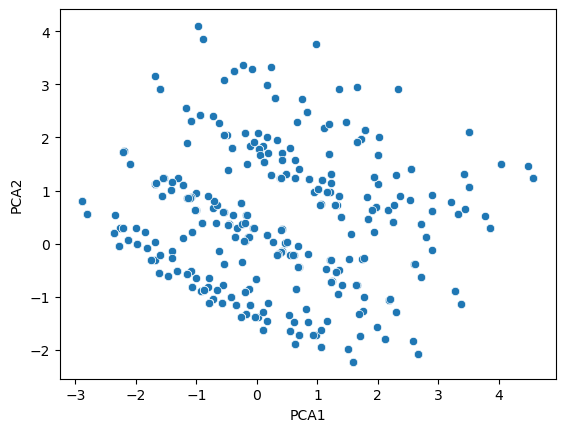

In [30]:
#Visualization of pca
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", palette="deep")

<AxesSubplot:>

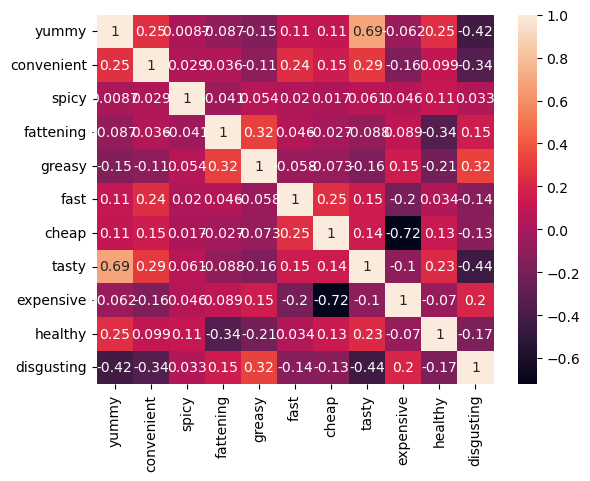

In [31]:
sns.heatmap(data1.corr(), annot=True)

##  Step5 :Extracting  segments

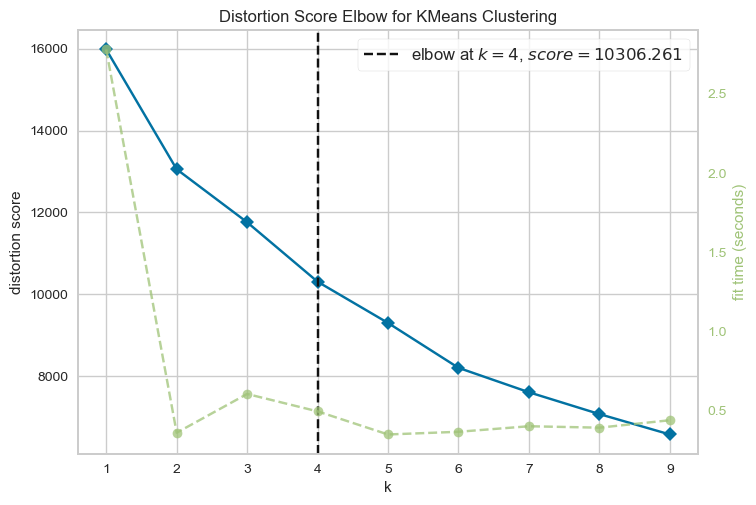

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
#import libaries from sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Instantiate the clustering model and visualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(scaled_df)        
visualizer.show() 

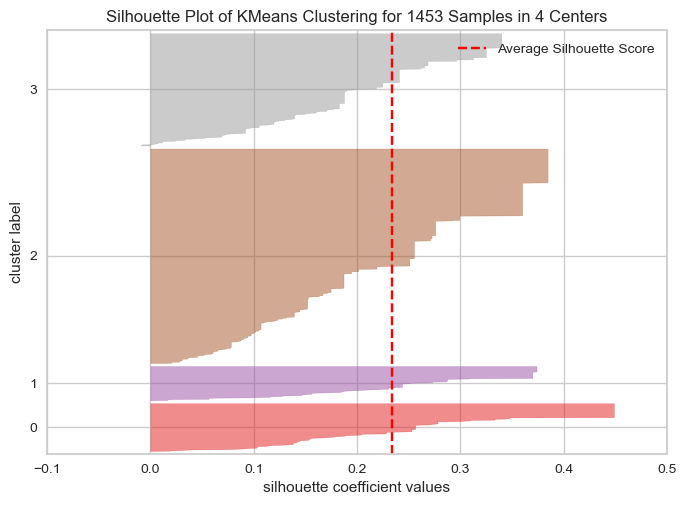

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1453 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [33]:
# Instantiate the clustering model and visualizer
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(4)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(scaled_df)    
visualizer.show()  

In [34]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

In [35]:
pca_df_kmeans.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,cluster
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170,3
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681,1
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530,1
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201,2
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144,2


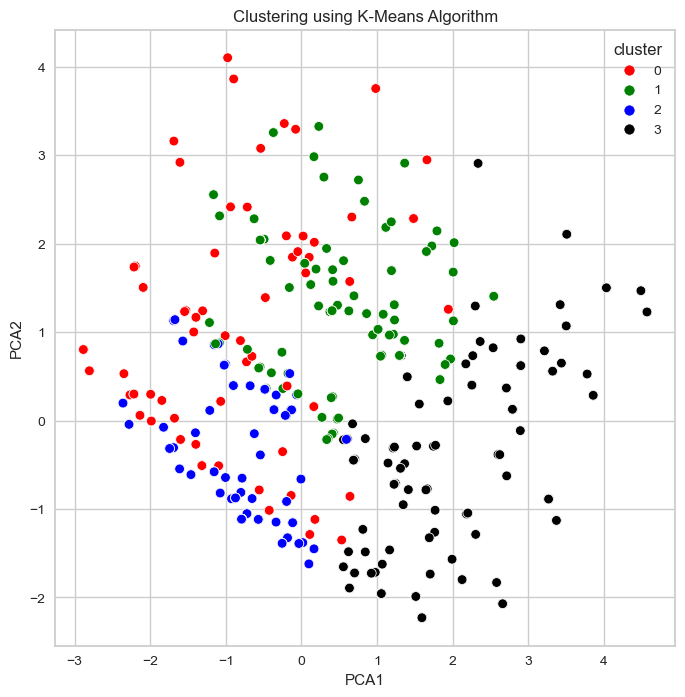

In [36]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [37]:
#assign cluster number with there type in PCA
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans1= pd.concat([data1,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,1
1,1,1,0,1,1,1,1,1,1,0,0,1
2,0,1,1,1,1,1,0,1,1,1,0,3
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,1


## Step 5  Profiling the segments

## Cluster Analysis 

<AxesSubplot:xlabel='cluster', ylabel='count'>

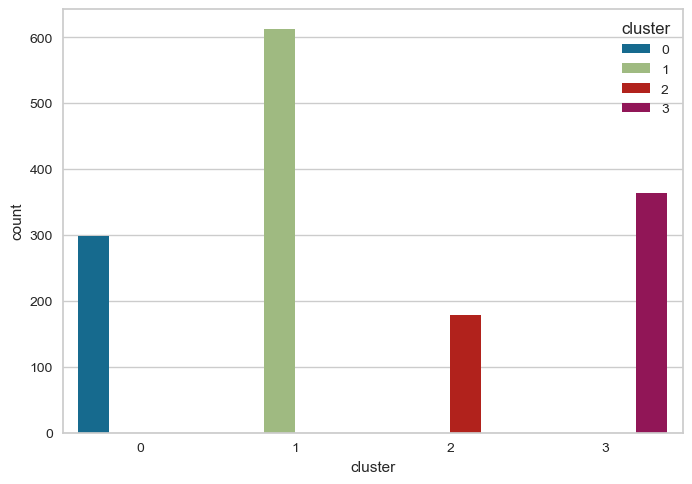

In [38]:
sns.countplot(x ='cluster', data = pca_df_kmeans1,hue = "cluster")

In [39]:
cluster_1_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==0]
cluster_1_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
8,0,0,0,1,1,0,0,0,1,0,1,0
10,0,1,0,1,0,1,1,0,0,0,1,0
18,0,0,0,1,1,1,1,0,1,0,1,0
33,0,1,0,1,1,1,1,0,0,0,1,0
35,0,1,0,1,1,1,1,0,0,0,1,0


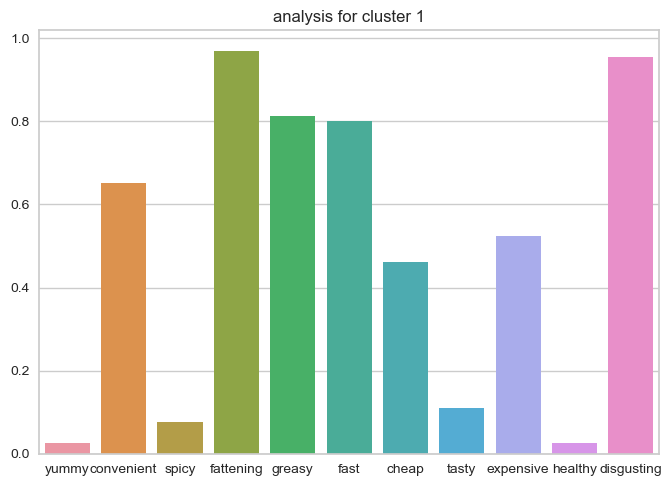

In [80]:
ax = sns.barplot(data=cluster_1_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 1')
plt.show()

Based on this analysis, we can conclude that group 1 tends to favor attributes such as being yummy, convenient, fattening, fast, cheap, and tasty. In contrast, this group shows a lower preference for attributes like spiciness, expensiveness, and healthiness. Moreover, it can be inferred that this type finds these attributes to be less disgusting.

In [41]:
cluster_2_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==1]
cluster_2_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,1
1,1,1,0,1,1,1,1,1,1,0,0,1
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,1
5,1,1,0,1,0,1,1,1,0,0,0,1


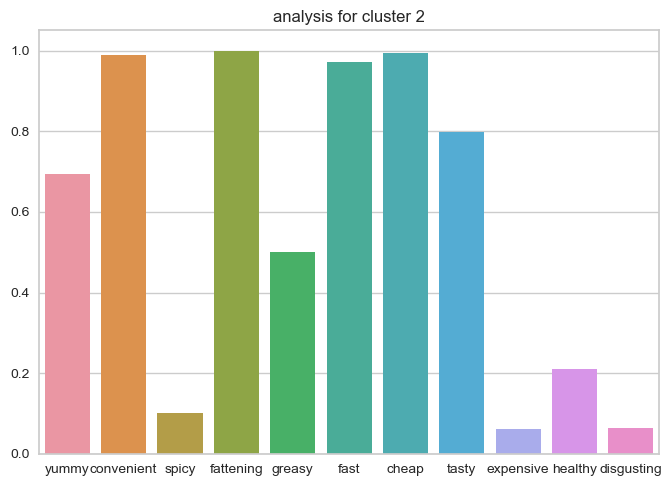

In [42]:
ax = sns.barplot(data=cluster_2_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 2')
plt.show()

Based on this analysis, we can conclude that this group predominantly prefers attributes such as convenience, fattening, greasiness, fastness, affordability, and taste. Conversely, this group demonstrates a lower preference for attributes like spiciness, strong taste, and healthiness. Furthermore, it can be inferred that this type generally finds these attributes to be quite disgusting.

In [43]:
cluster_3_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==2]
cluster_3_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
17,1,1,0,0,1,1,0,1,0,0,0,2
28,0,1,0,0,0,1,0,0,0,0,0,2
31,0,1,0,0,0,1,1,1,0,1,0,2
46,0,1,0,0,0,1,0,1,0,1,0,2
54,1,1,0,0,0,1,1,1,0,1,0,2


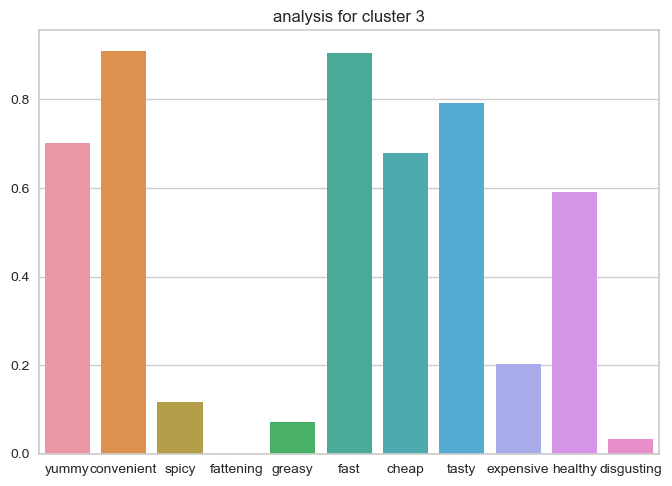

In [44]:
ax = sns.barplot(data=cluster_3_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 3')
plt.show()



Based on this analysis, we can conclude that this type primarily favors attributes such as being yummy, convenient, fattening, greasy, fast, and expensive. Conversely, this type exhibits a lower preference for attributes like spiciness, affordability, and healthiness. Additionally, it can be inferred that this type finds these attributes to be less disgusting.

In [45]:
cluster_4_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==3]
cluster_4_df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
2,0,1,1,1,1,1,0,1,1,1,0,3
6,1,1,1,1,0,1,0,1,1,1,0,3
9,1,1,0,1,1,1,0,1,1,0,0,3
11,1,1,0,1,1,1,0,1,1,0,1,3
13,1,1,0,1,0,1,0,1,1,1,0,3


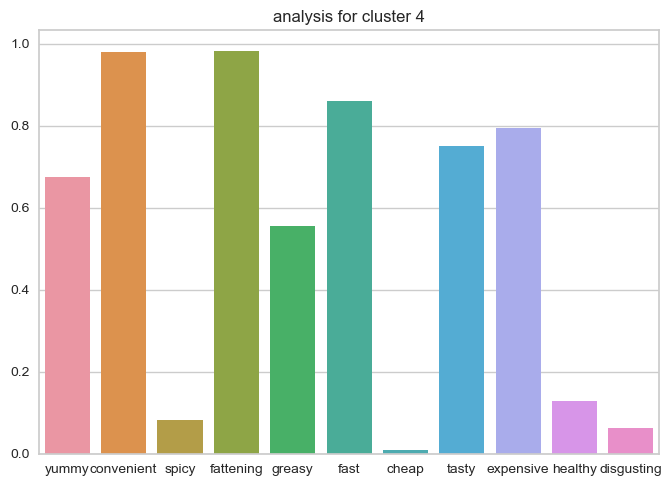

In [46]:
ax = sns.barplot(data=cluster_4_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 4')
plt.show()

Based on this analysis, we can conclude that this type shows a stronger preference for attributes such as being yummy, convenient, fast, cheap, healthy, and tasty. Conversely, this type demonstrates a lower preference for attributes like spiciness, fattening, greasiness, and expensiveness. Furthermore, it can be inferred that this type finds these attributes to be less disgusting.

# Step:7 Describining Segments

In [47]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [48]:
data_new= pd.concat([data,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
data_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,1
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,3
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,1


In [49]:
data_new['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [50]:
data_new["VisitFrequency"]= data_new["VisitFrequency"].replace({'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4, 'More than once a week':5})

In [51]:
data_new['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [52]:
data_new['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

In [53]:
data_new["Like"]= data_new["Like"].replace({'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})


In [54]:
data_new["Gender"]= data_new["Gender"].replace({'Female':0, 'Male':1})

In [55]:
data_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,2,0,1
1,1,1,0,1,1,1,1,1,1,0,0,7,51,2,0,1
2,0,1,1,1,1,1,0,1,1,1,0,6,62,2,0,3
3,1,1,0,1,1,1,1,1,0,0,1,9,69,4,0,1
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,1


In [56]:
from statsmodels.graphics.mosaicplot import mosaic

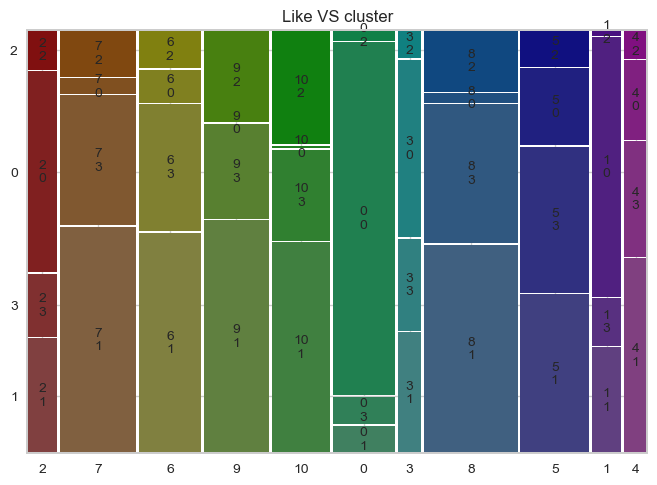

In [57]:
mosaic(data_new, ['Like','cluster'],title='Like VS cluster')
plt.show()

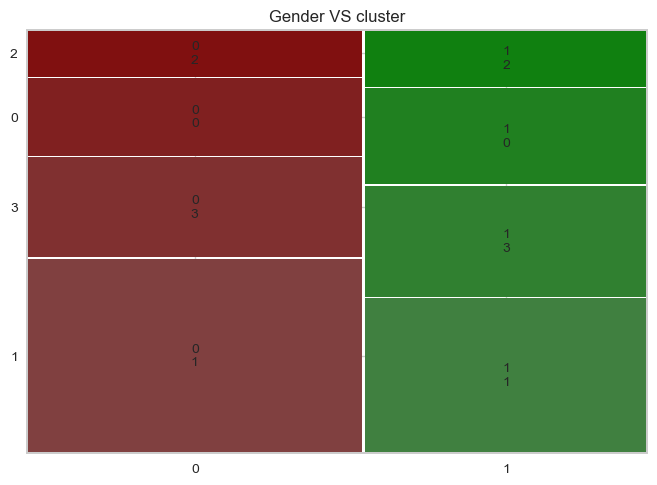

In [58]:
mosaic(data_new, ['Gender','cluster'],title='Gender VS cluster')
plt.show()

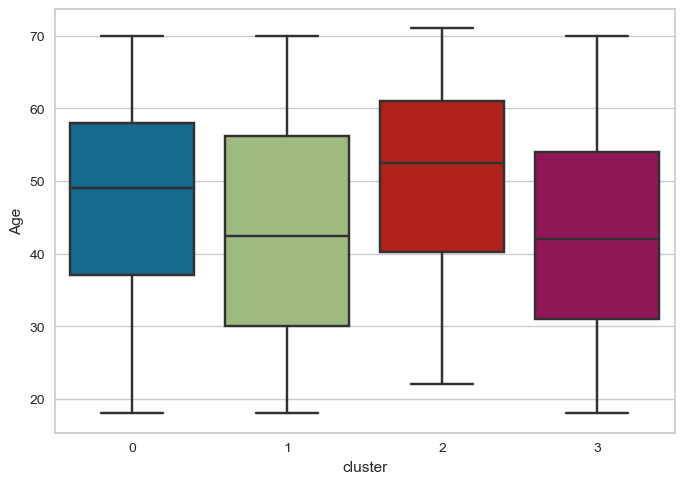

In [59]:
sns.boxplot(x=data_new['cluster'], y=data_new['Age'])
plt.show()

# Step 8: Selecting Target Segments

In [60]:
X = data_new.drop(['cluster'],axis=1)
y= data_new[['cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [61]:
X_test.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1017,0,1,0,1,1,1,0,0,1,0,1,0,50,0,0
1160,0,1,0,1,0,1,1,1,0,1,0,6,60,2,0
1170,1,1,0,1,1,1,0,0,0,0,0,6,57,2,1
611,0,1,0,0,0,1,1,0,0,0,0,5,29,1,1
1401,0,1,0,1,1,1,1,0,0,0,1,0,52,0,0


In [62]:
y_test.head()


,cluster
1017,0
1160,1
1170,3
611,2
1401,0


In [63]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

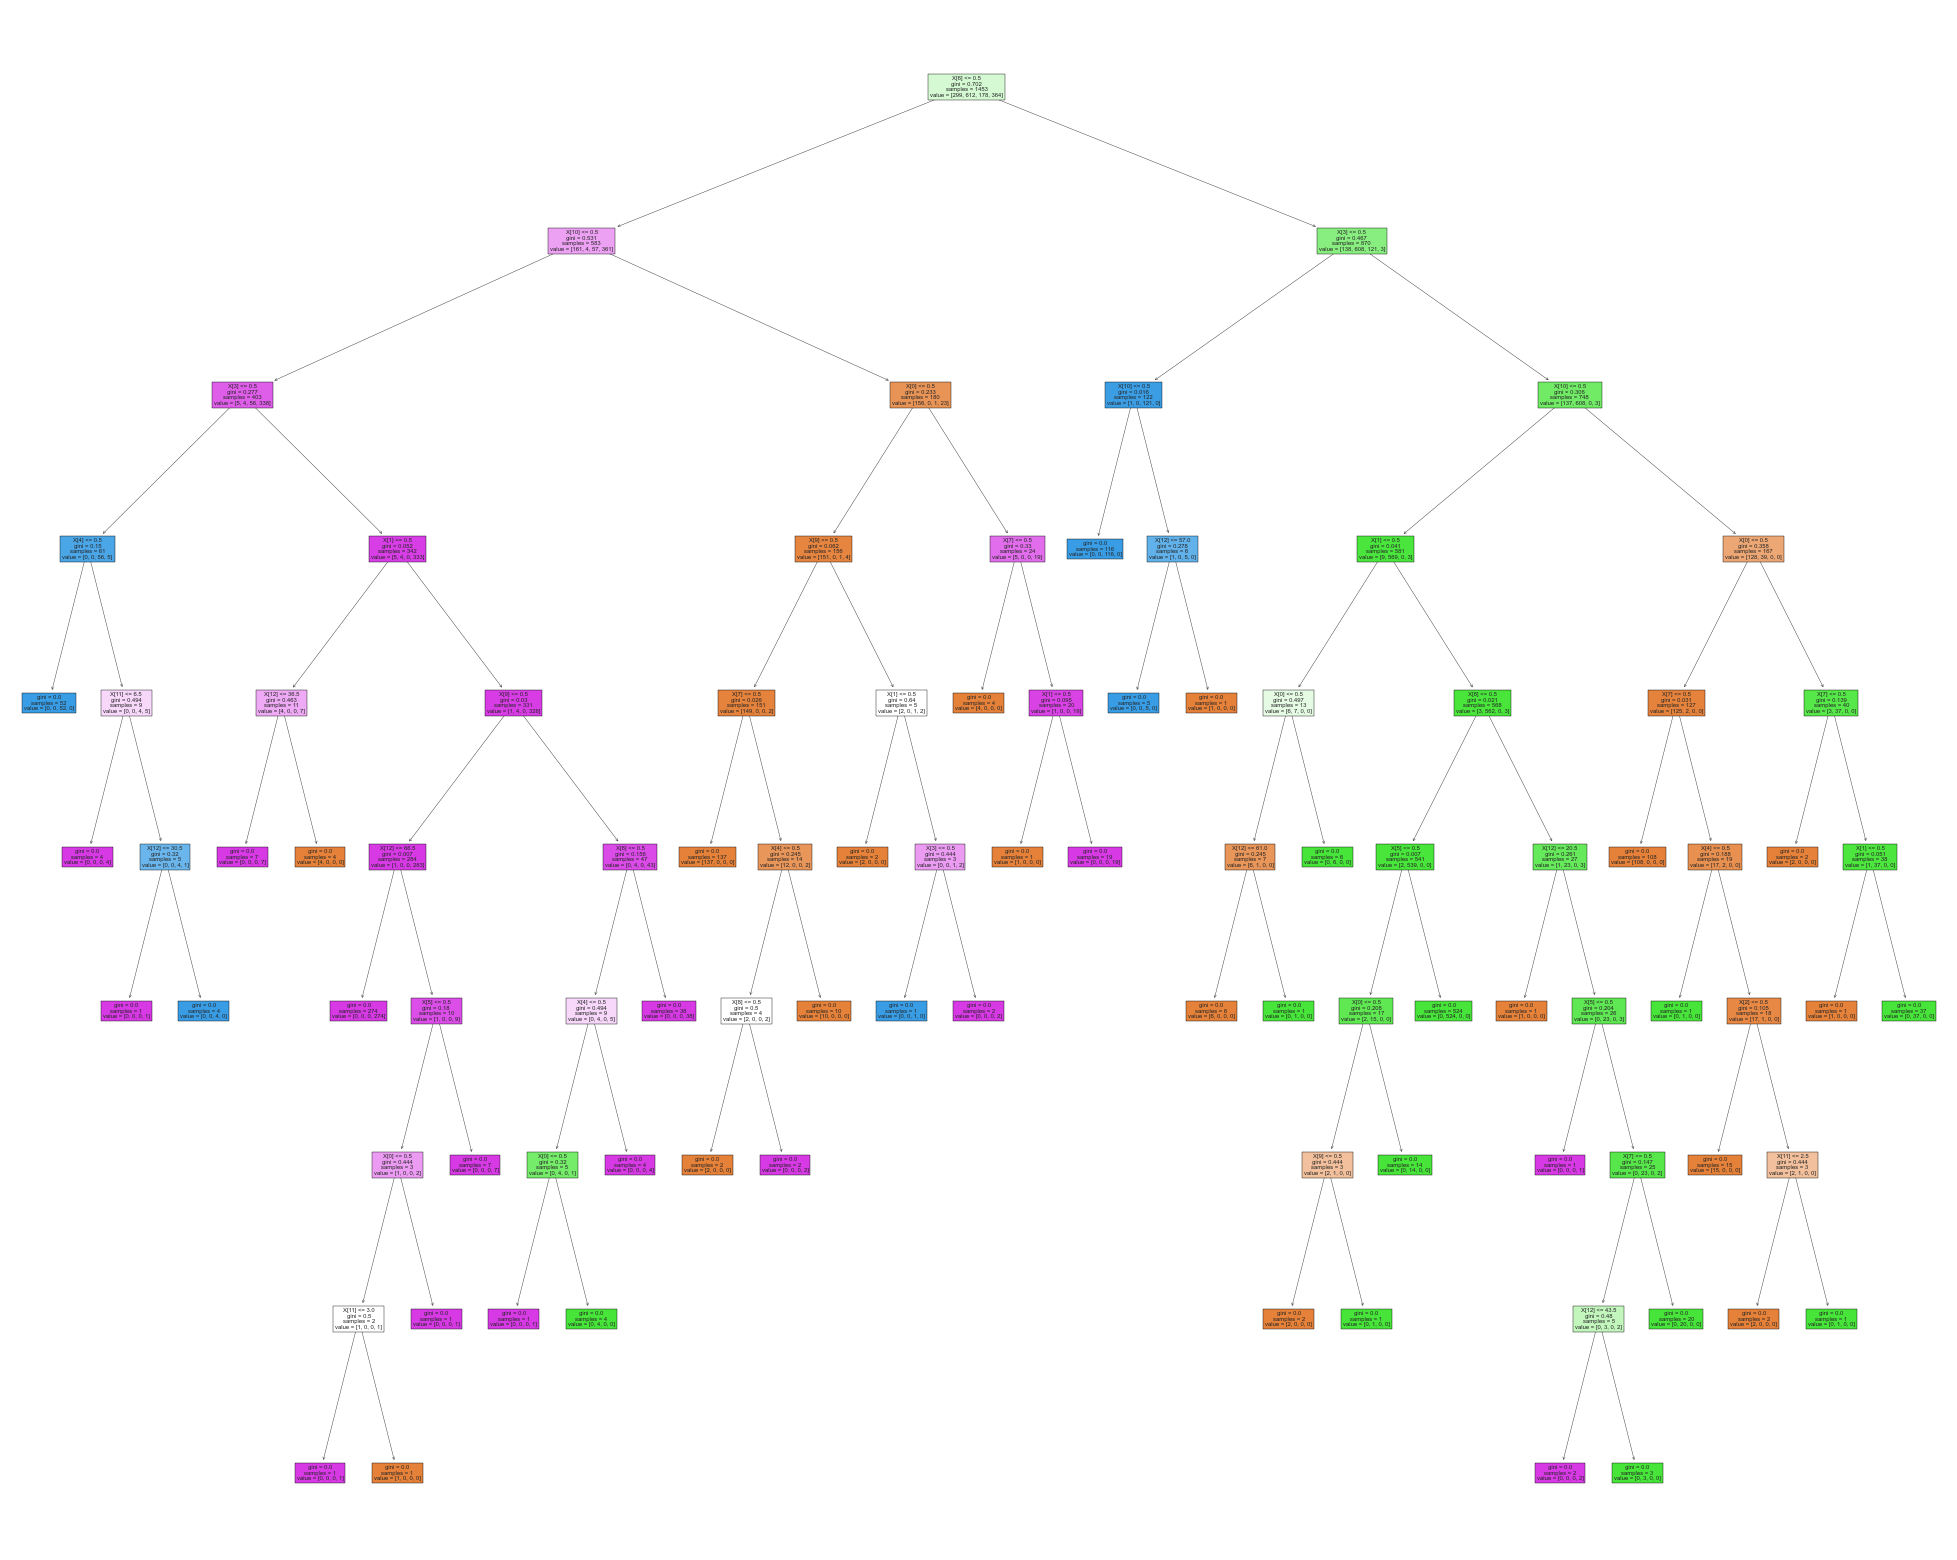

In [64]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,   filled=True)

In [65]:
fig = px.funnel(x=data_new['VisitFrequency'], y=data_new['Like'], color=data_new['Like'], title='VisitFrequency vs Like', labels={ 'x': 'VisitFrequency', 'y': 'Like' })
fig.show()

In [66]:
model= DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [67]:
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 82   3   0   1]
 [  1 180   0   0]
 [  1   0  48   1]
 [  2   2   3 112]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        86
           1       0.97      0.99      0.98       181
           2       0.94      0.96      0.95        50
           3       0.98      0.94      0.96       119

    accuracy                           0.97       436
   macro avg       0.96      0.96      0.96       436
weighted avg       0.97      0.97      0.97       436



In [68]:
import pickle
filename = 'model.pkl'
pickle.dump(model, open(filename, 'wb'))
  
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9678899082568807 % Acuuracy
